# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 5: Deep Learning
## STARTER CODE
Jacob Perrone
### Link to live version here:
https://colab.research.google.com/drive/1GlRLRgyG7YfkbxKch5x71vn7ZqfcSJBS?usp=sharing

### Goals 

- To learn how to use perform classification using neural networks.
- To appreciate the differences in neural network architectures for the same task -- image classification -- and dataset (MNIST, CIFAR-10).
- To learn how to implement and evaluate deep learning models in Python, using Keras and TensorFlow. 

### Instructions

- This assignment is structured in 2 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional. 

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 


## Setup

### Imports


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam 

from tensorflow.keras import layers

from matplotlib import pyplot as plt

import numpy as np

## PART 1: Digit classification using MNIST

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

http://yann.lecun.com/exdb/mnist/


### 1a. Shallow neural network architecture

Based on https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

#### Load and prepare the data

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

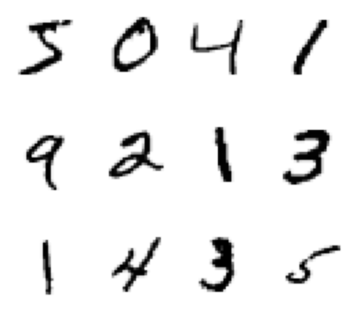

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

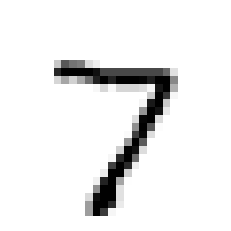

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### Build your first neural network model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

#### Configure model

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(lr=0.01), 
    metrics=['accuracy']
)

#### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.1275 - val_loss: 0.0915 - val_accuracy: 0.1356
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.1482 - val_loss: 0.0908 - val_accuracy: 0.1591
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.1714 - val_loss: 0.0903 - val_accuracy: 0.1825
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.1922 - val_loss: 0.0898 - val_accuracy: 0.2027
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.2137 - val_loss: 0.0894 - val_accuracy: 0.2270
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.2386 - val_loss: 0.0890 - val_accuracy: 0.2591
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.2696 - val_loss: 0.0886 - val_accuracy: 0.2900

#### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


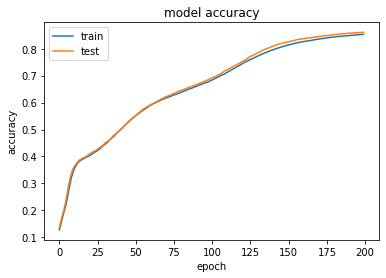

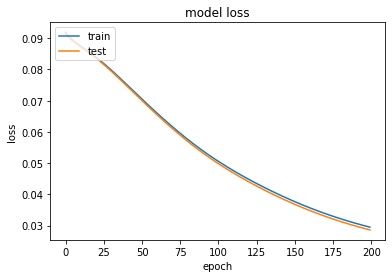

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.8611


[0.02860953100025654, 0.8611000180244446]

### 1.1 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, and learning rate, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

2. Write code to train the same network with different options for `batch_size` and number of epochs.

3. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default = 0.001) | `categorical_crossentropy` | 128 | 200 | 0.9719 | Hard to tell I believe loss function and learning rate were better for the data |
| Variation #2 | SGD | 0.01 | `Mean squared error` | 128 | 500 | 0.8855 | Improved accuracy thanks to increased number of epochs (compared to  baseline) |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 200 | 0.9468 | Improved accuracy thanks to loss function (compared to baseline) |

4. Write a short paragraph summarizing what you have learned from this exercise. 

### Code for 1.)


Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 2.0734 - accuracy: 0.4564 - val_loss: 1.8293 - val_accuracy: 0.6768
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 1.6367 - accuracy: 0.7131 - val_loss: 1.4374 - val_accuracy: 0.7639
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 1.3010 - accuracy: 0.7746 - val_loss: 1.1527 - val_accuracy: 0.8004
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 1.0675 - accuracy: 0.8068 - val_loss: 0.9614 - val_accuracy: 0.8240
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.9098 - accuracy: 0.8253 - val_loss: 0.8309 - val_accuracy: 0.8402
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.8001 - accuracy: 0.8384 - val_loss: 0.7384 - val_accuracy: 0.8497
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.7204 - accuracy: 0.8473 - val_loss: 0.6697 - val_accuracy: 0.8596

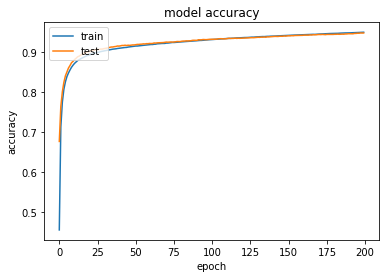

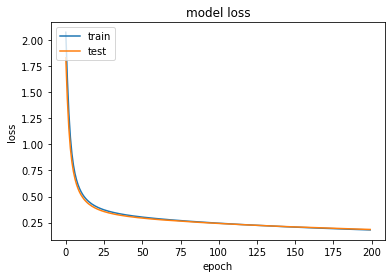

313/313 [==============================] - 1s 2ms/step - loss: 0.1847 - accuracy: 0.9468


[0.18470673263072968, 0.9467999935150146]

In [ ]:
# !.) Different options for loss, optimizer and learning rate
# code taken above to load and process data and for the neural network
# download and prepare data 
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)
 
# Build model NN
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# configure model changing optimizer, loss, and learning rate
model.compile(
    loss='categorical_crossentropy', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

# Train model
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate model
model.evaluate(X_validation, y_validation)

### code for 2.)

Epoch 1/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.0777 - val_loss: 0.0925 - val_accuracy: 0.1197
Epoch 2/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0917 - accuracy: 0.1540 - val_loss: 0.0911 - val_accuracy: 0.1741
Epoch 3/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1877 - val_loss: 0.0903 - val_accuracy: 0.2016
Epoch 4/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.2095 - val_loss: 0.0896 - val_accuracy: 0.2214
Epoch 5/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2303 - val_loss: 0.0891 - val_accuracy: 0.2397
Epoch 6/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.2480 - val_loss: 0.0886 - val_accuracy: 0.2580
Epoch 7/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.2675 - val_loss: 0.0882 - val_accuracy: 0.2759

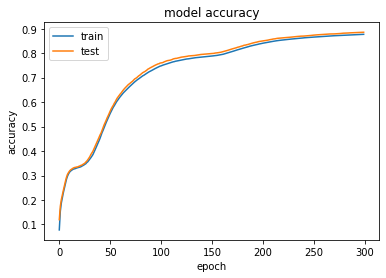

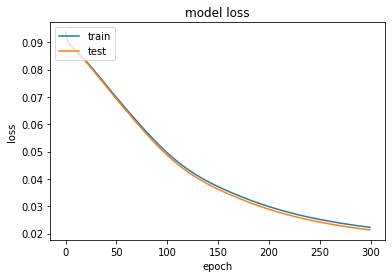

313/313 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.8855


[0.021316668018698692, 0.8855000138282776]

In [ ]:
# 2.) changing batch size and epochs 
# download and prepare data 
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)
 
# Build model NN
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# configure model changing optimizer, loss, and learning rate
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

# Train model
batch_size=128
epochs=300

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate model
model.evaluate(X_validation, y_validation)

### 3.) table of results
| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | SGD | 0.01 | `mean_squared_error` | 128 | 200 | 0.8660 | Comparable to Naive Bayes |
| Variation #1 | ADAM | (default = 0.001) | `categorical_crossentropy` | 128 | 200 | 0.9719 | Hard to tell I believe loss function and learning rate were better for the data |
| Variation #2 | SGD | 0.01 | `Mean squared error` | 128 | 500 | 0.8855 | Improved accuracy thanks to increased number of epochs (compared to  baseline) |
| Variation #3 | SGD | 0.01 | `categorical_crossentropy` | 128 | 200 | 0.9468 | Improved accuracy thanks to loss function (compared to baseline) |

### *I would like to note that not all testing parameters are shown but the code was the same just went in and changed the parameters that were asked to be changed. 
### 4.) what i learned:
From this exercise i learned that changing (fine-tuning) parameters such as learning rate, optimizer, loss function, and batch size and epochs each effected the validation accuracy. 

variation 1 changed the loss, optimizer and learning rate, after further testing it can be concluded that the loss function and learning rate caused the increase in accuracy as changing the learning rate to 0.01 as was in the baseline lead to a decrease from 0.9719 to 0.9650 (this is shown in a seperate google colab i created to change parameters link is here: https://colab.research.google.com/drive/18oqCWlOJEKEDpoNMVlS2mzV9QyuYUjQy?usp=sharing ). 

In variation 2 i changed the baseline code to run 300 epochs instead of 200 and as i predicted the accuracy increased although i did expect a larger increase. I would also predict that increaseing the batch size as well as the epoch size would increase the accuracy but that has not been tested yet. Also have not tested just changing the batch size by itself but will amend this section with the results if time allows. 

variation 3 I wanted to see how SGD optimizer performed with the categorical cross entropy loss function. With  only the loss function changing from the baseline it yielded a much higher accuracy (increase of 0.0808). 

From these results i can conclude that thorough testing is needed to find the optimal parameters for a given data set and knowing the dataset before hand can help in narrowing which ones to use. 

### 1b. Convolutional neural network architecture

Based on https://keras.io/examples/vision/mnist_convnet/ 

In [ ]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

#### Configure model

In [ ]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

#### Prepare the data
The CNN does not expect the images to be flattened.

In [ ]:
# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Train!


In [ ]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3364 - accuracy: 0.8991 - val_loss: 0.0832 - val_accuracy: 0.9750
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1043 - accuracy: 0.9682 - val_loss: 0.0521 - val_accuracy: 0.9836
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0413 - val_accuracy: 0.9860
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0660 - accuracy: 0.9793 - val_loss: 0.0380 - val_accuracy: 0.9864
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0317 - val_accuracy: 0.9889
Epoch 

#### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


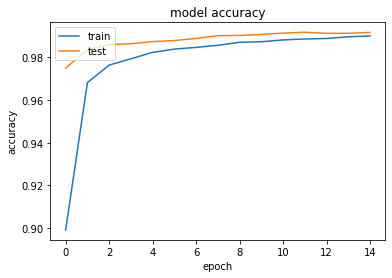

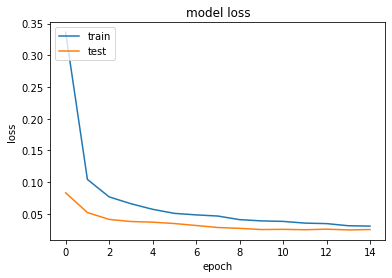

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Evaluate the model

In [ ]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9917


[0.025308577343821526, 0.9916999936103821]

### 1.2 Your turn! (30 points)

1. Write code to train the same network with different options for `loss`, `optimizer`, learning rate,  `batch_size` and number of epochs.

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

### 1.) same network different options: 
### * same code will be used and run with the table updating the results


Epoch 1/25
613/613 [==============================] - 3s 4ms/step - loss: 2.2722 - accuracy: 0.1475 - val_loss: 2.2215 - val_accuracy: 0.3315
Epoch 2/25
613/613 [==============================] - 2s 4ms/step - loss: 2.1744 - accuracy: 0.2785 - val_loss: 2.0804 - val_accuracy: 0.5841
Epoch 3/25
613/613 [==============================] - 2s 4ms/step - loss: 1.9668 - accuracy: 0.4344 - val_loss: 1.7257 - val_accuracy: 0.7306
Epoch 4/25
613/613 [==============================] - 2s 4ms/step - loss: 1.5498 - accuracy: 0.5623 - val_loss: 1.1474 - val_accuracy: 0.7887
Epoch 5/25
613/613 [==============================] - 2s 4ms/step - loss: 1.1530 - accuracy: 0.6453 - val_loss: 0.7870 - val_accuracy: 0.8287
Epoch 6/25
613/613 [==============================] - 2s 4ms/step - loss: 0.9271 - accuracy: 0.7039 - val_loss: 0.6196 - val_accuracy: 0.8539
Epoch 7/25
613/613 [==============================] - 2s 4ms/step - loss: 0.7954 - accuracy: 0.7477 - val_loss: 0.5283 - val_accuracy: 0.8683
Epoch 

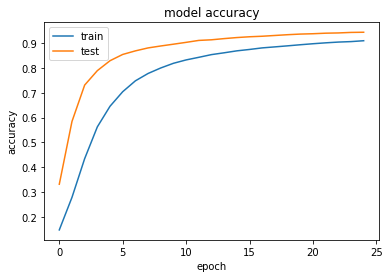

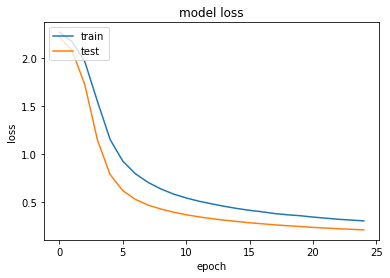

313/313 [==============================] - 1s 2ms/step - loss: 0.2104 - accuracy: 0.9433


[0.21038620173931122, 0.9433000087738037]

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# CNN model 
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# CNN optimizer, loss etc
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer=SGD(learning_rate=0.001), 
    metrics=["accuracy"]
)

# Reload the data, just in case
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

# Scale images to the [0, 1] range
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# Redefine  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Train
batch_size=98
epochs=25

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate
model_cnn.evaluate(X_valid_cnn, y_validation)

### 2.) Table of results
| Method | optimizer | learning rate | loss | batch size | epochs | Validation accuracy | Remarks |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Baseline  | ADAM | Default(=0.001) | `Categorical_crossentropy` | 128 | 15 | 0.9917 | really good results from give parameters for dataset |
| Variation #1 | SGD | 0.001 | `Categorical_crossentropy` | 128 | 15 | 0.9079 | lowered accuracy because of the SGD optimizer |
| Variation #2 | SGD | 0.001 | `Categorical_crossentropy` | 128 | 25 | 0.9151 | Improved accuracy thanks to increased number of epochs (not significant accuracy increase) |
| Variation #3 | SGD | 0.001 | `Categorical_crossentropy` | 98 | 25 | 0.9433 | Improved accuracy thanks to lower batch size |

### 3.) what i learned:
From this exercise I learned that SGD was not the most best optimizer for the dataset. Also increasing epochs while decreasing batch size led to the highest accuracy of SGD optimize. I really wanted to find a way to get SGD to get closer to the adam accuracy in the baseline parameters (there are other parameter settings i have not tried if there is time i will try them and amend this section).

### 1.3 BONUS! (10 points)

1. Change the architecture of the CNN (number of layers, use of (and amount of) Dropout,  conv2D layers' [parameters](https://keras.io/api/layers/convolution_layers/convolution2d/) (stride, padding, kernel size, etc.), type and parameters of [pooling layers](https://https://keras.io/api/layers/pooling_layers/), etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table similar to the one for item 1.1.

3. Write a short paragraph summarizing what you have learned from this exercise. 

## PART 2: Image classification using the CIFAR-10 dataset
  
In this project you will design and implement a deep learning solution for image classification using the CIFAR-10 dataset.

https://www.cs.toronto.edu/~kriz/cifar.html 


See also:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


### Setup

In [6]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers

### Load and prepare the data

In [7]:
# Load the dataset
(x_training, y_training), (x_testing, y_testing) = cifar10.load_data()

# Normalize the image data
x_train = x_training.astype("float32") / 255.0
y_training = np.squeeze(y_training)
x_test = x_testing.astype("float32") / 255.0
y_testing = np.squeeze(y_testing)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_training, num_classes)
y_test = keras.utils.to_categorical(y_testing, num_classes)

170500096/170498071 [==============================] - 2s 0us/step


### Explore the data

In [ ]:
# Number of samples
print("Number of training samples: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


In [8]:
# Number of classes
num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


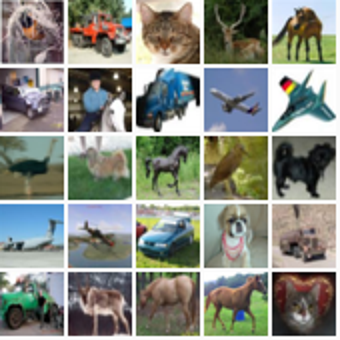

In [9]:
# Show collage of 25 (randomly selected) images

# Every time you run this cell, you should see 25 different images. 
# That's fine (and desired, actually).

height_width = 32

def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_training[0]
print(idx)

6


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

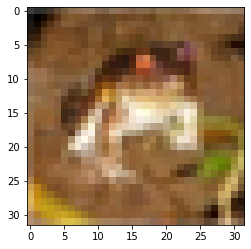

In [ ]:
plt.imshow(x_train[0])

### 2a. Baseline model

Let's start by using a convolutional neural network (CNN) built from scratch as a baseline.


#### Build and configure the model

In [10]:
batch_size = 128
epochs = 40
data_augmentation = False

In [11]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [12]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#### Train the model

In [13]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/40
391/391 [==============================] - 5s 12ms/step - loss: 1.9513 - accuracy: 0.2832 - val_loss: 1.6865 - val_accuracy: 0.3944
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 1.6719 - accuracy: 0.3909 - val_loss: 1.5739 - val_accuracy: 0.4219
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 1.5627 - accuracy: 0.4346 - val_loss: 1.4360 - val_accuracy: 0.4795
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 1.4755 - accuracy: 0.4657 - val_loss: 1.3620 - val_accuracy: 0.5129
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 1.4108 - accuracy: 0.4938 - val_loss: 1.3223 - val_accuracy: 0.5295
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3556 - accuracy: 0.5167 - val_loss: 1.2643 - val_accuracy: 0.5508
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 1.3041 - accuracy: 0.5357 - val_loss: 1.2179 - val_accuracy: 0.5697

In [14]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


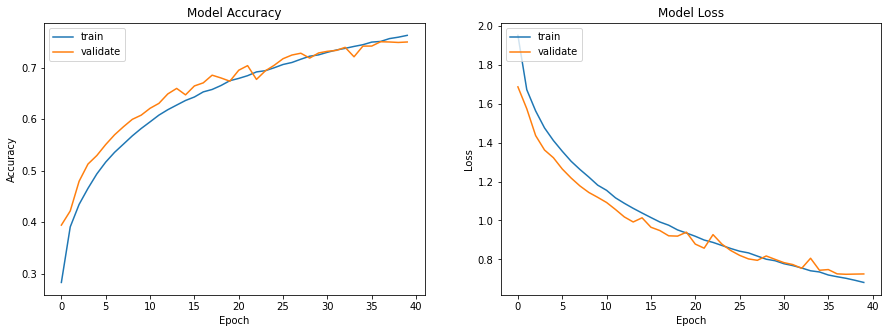

In [15]:
plotmodelhistory(history)

#### Evaluate the model

In [21]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7248 - accuracy: 0.7498
Test loss: 0.7248125076293945
Test accuracy: 0.7498000264167786


In [22]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

NameError: ignored

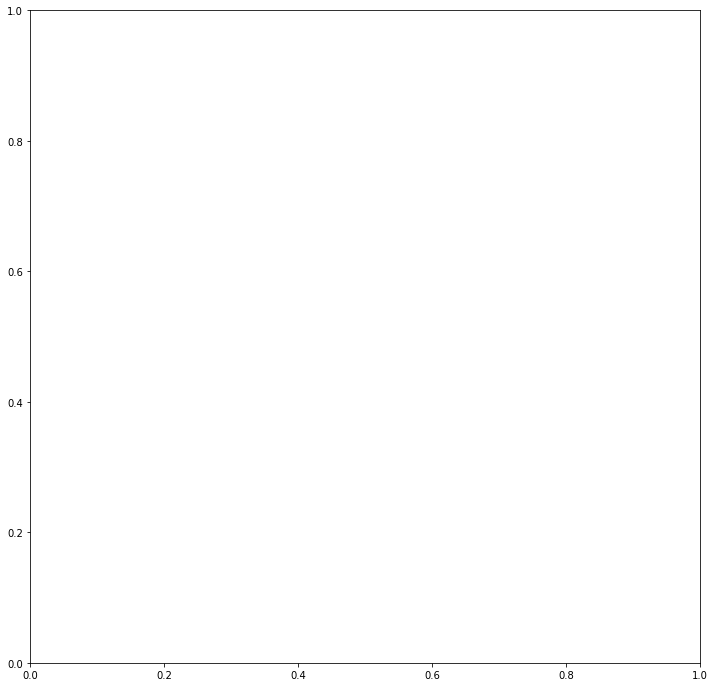

In [24]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [25]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.89      0.83      0.86      1000
           2       0.70      0.60      0.64      1000
           3       0.60      0.53      0.56      1000
           4       0.68      0.74      0.71      1000
           5       0.67      0.65      0.66      1000
           6       0.70      0.88      0.78      1000
           7       0.81      0.80      0.81      1000
           8       0.86      0.83      0.85      1000
           9       0.80      0.86      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



NameError: ignored

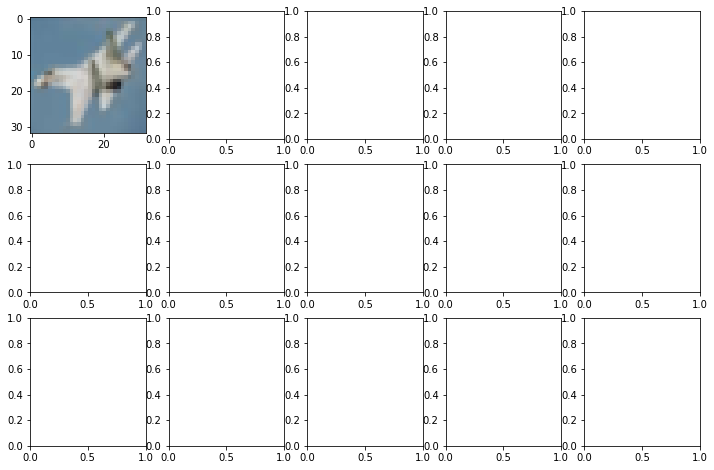

In [26]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [27]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


NameError: ignored

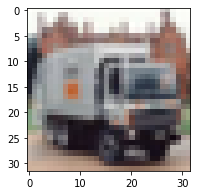

In [28]:
show_test(11)

### 2b. Transfer Learning

Now we will see how we could use a [pretrained (on ImageNet) model](https://https://keras.io/api/applications/) to perform the same task (image classification) using a different dataset (CIFAR-10), using the *transfer learning* paradigm.

See:

https://www.kaggle.com/adi160/cifar-10-keras-transfer-learning

https://keras.io/guides/transfer_learning/

#### Transfer Learning: setup

In [29]:
from keras import Sequential
from keras.applications import VGG19,ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [30]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [31]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [32]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [33]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [34]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


#### Attempt #1: using ResNet50 as a base model 

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50 

In [35]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

model_1.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4000)              8196000   
_________________________________________________________________
dense_7 (Dense)              (None, 2000)              8002000   
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_______________________________________________________

In [36]:
batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)

In [37]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 22s 80ms/step - loss: 1.5820 - accuracy: 0.4417 - val_loss: 1.1385 - val_accuracy: 0.6068
Epoch 2/10
274/274 [==============================] - 21s 76ms/step - loss: 0.8915 - accuracy: 0.6905 - val_loss: 0.9068 - val_accuracy: 0.6844
Epoch 3/10
274/274 [==============================] - 21s 78ms/step - loss: 0.6204 - accuracy: 0.7825 - val_loss: 0.8731 - val_accuracy: 0.7084
Epoch 4/10
274/274 [==============================] - 21s 78ms/step - loss: 0.4340 - accuracy: 0.8504 - val_loss: 0.8960 - val_accuracy: 0.7181
Epoch 5/10
274/274 [==============================] - 21s 77ms/step - loss: 0.3114 - accuracy: 0.8927 - val_loss: 0.9416 - val_accuracy: 0.7243
Epoch 6/10
274/274 [==============================] - 21s 77ms/step - loss: 0.2133 - accuracy: 0.9278 - val_loss: 1.0260 - val_accuracy: 0.7205
Epoch 7/10
274/274 [==============================] - 21s 78ms/step - loss: 0.1501 - accuracy: 0.9495 - val_loss: 1.2230 - val_accuracy:

In [40]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


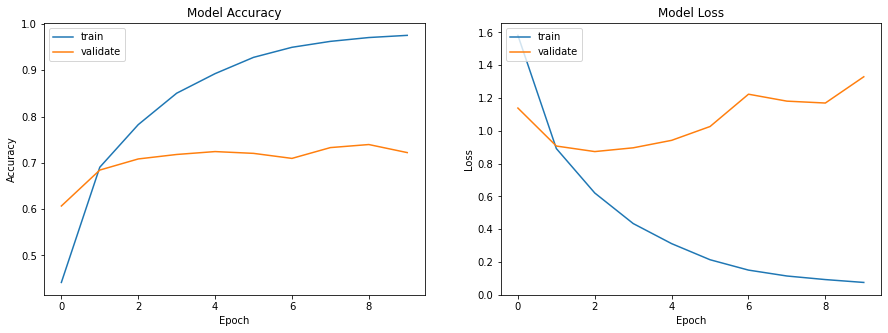

In [45]:
plotmodelhistory(history_1)

In [44]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.3194 - accuracy: 0.7236
Test loss: 1.3194091320037842
Test accuracy: 0.7235999703407288


In [46]:
  def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [47]:
y_pred=model_1.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

In [48]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

NameError: ignored

Normalized confusion matrix


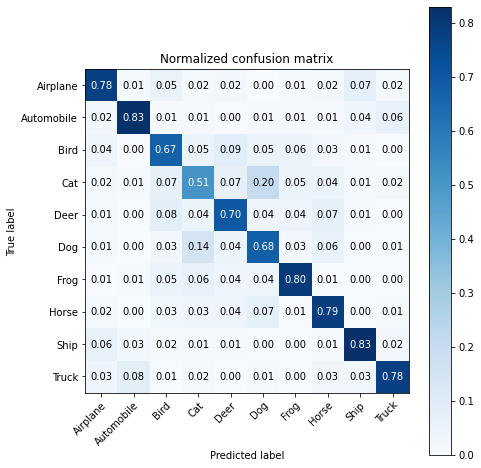

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

### 2.1 Your turn! (30 points)

1. Write code to build, train, and evaluate at least three additional transfer learning models and combinations of (hyper)parameters.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)

2. Record the several combinations (at least 3, besides the baseline) you have tried and the resulting accuracy in a summary table like this:

| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7526 | Baseline |
| Variation #1 | ... | ... | ... | ... | Improved accuracy thanks to X |
| Variation #2 | ... | ... | ... | ... | Improved accuracy thanks to Y |
| Variation #3 | ... | ... | ... | ... | Improved accuracy thanks to Z |

3. Write a short paragraph summarizing what you have learned from this exercise. 









### 1.) code * the same code is reused for each transfer learning change

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))
80142336/80134624 [==============================] - 0s 0us/step
Epoch 1/10
274/274 [==============================] - 22s 80ms/step - loss: 2.0341 - accuracy: 0.2597 - val_loss: 1.7273 - val_accuracy: 0.4007
Epoch 2/10
274/274 [==============================] - 22s 80ms/step - loss: 1.1688 - accuracy: 0.5773 - val_loss: 0.8331 - val_accuracy: 0.7099
Epoch 3/10
274/274 [==============================] - 22s 79ms/step - loss: 0.7310 - accuracy: 0.7478 - val_loss: 0.7891 - val_accuracy: 0.7331
Epoch 4/10
274/274 [==============================] - 21s 78ms/step - loss: 0.5849 - accuracy: 0.7980 - val_loss: 0.6213 - val_accuracy: 0.7855
Epoch 5/10
274/274 [==============================] - 22s 79ms/step - loss: 0.4749 - accuracy: 0.8365 - val_loss: 0.5857 - val_accuracy: 0.8006
Epoch 6/10
274/274 [==============================] - 22s 79ms/step - loss: 0.3848 - accuracy: 0.8669 - val_loss:

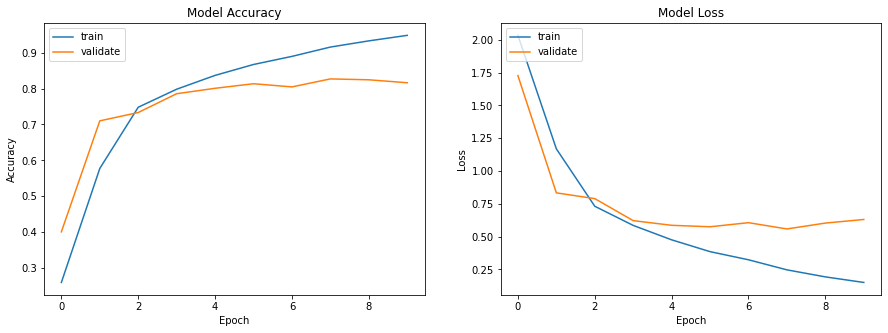

313/313 [==============================] - 3s 11ms/step - loss: 0.6798 - accuracy: 0.8054
Test loss: 0.6798405051231384
Test accuracy: 0.805400013923645


In [49]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))
#model
base_model_1 = VGG19(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu'))) 
model_1.add(Dense(1000,activation=('relu'))) 
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

batch_size= 128
epochs=10
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate)
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()
plotmodelhistory(history_1)
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

### 2.) Summary table
| Method | Base model | Relevant (hyper)parameters | Test loss | Test accuracy | Remarks |
| --- | --- | --- | --- | --- | --- |
| Baseline  | ResNet50 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 1.2025 | 0.7526 | Baseline |
| Variation #1 | ResNet50 | ADAM, batch_size= 128, epochs=10, learn_rate=.001 | 0.9990 | 0.7429 | decreased accuracy thanks to changing the optimizer |
| Variation #2 | ResNet50 | SGD, batch_size= 98, epochs=10, learn_rate=.001 | 1.114 | 0.7552 | Improved accuracy thanks to smaller batch sizes |
| Variation #3 | VGG19 | SGD, batch_size= 128, epochs=10, learn_rate=.001 | 0.6798 | 0.8054 | Improved accuracy thanks to using a different pre trained network |

### 3.) What I learned:
From this exercies I learned that using a pre trained network is useful when needing to get off the ground with a neural network. The pre trained network provides a conveince factor as the only thing to do is setup your parameters and train the network on the data you are using. As with the other section the fine tuning of parameters and the selection of the pre trained network are important to getting a good accuracy with the data.

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

### 1.) Learned from assignment:
  - Fine tuning parameters for neural networks is key to getting sound results (accuracy in our case or whatever metric is being measured)
  Using transfer learning on pre trained networks can be convenient to use but still requires fine tuning.

### 2.) Most fun:
  - seeing how to build a CNN 
  - fine tuning the parameters to see if a increase in the metric would occur
  the ease of use of google colab in training the models 
### Time consuming:
  - waiting for the models to finish training 
### Enlightening:
  - That decreasing the batch size led to an increase in accuracy (based on the stochasticity of the gradient descent as too large a batch size can be negative to accuracy) 

### Another weekk to finish:
If i had another week i would have attempted the bonus point question and would have researched more about the CNN. I also would have experimetned with other optimizers that keras can use and other loss functions as well. 

